# Lab 1: Deep Learning
## Universidad Santiago de Compostela

Students:
- Víctor Barreiro Domínguez
- Maximiliano Hormazábal Lagos


### Import libraries

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

### Getting the MNIST dataset

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
# Loading the dataset in train and test sets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape to transform it into array with 2 dimensions
n_samples_train,n_row,n_col = train_images.shape
n_samples_test,_,_ = test_images.shape
train_images = train_images.reshape((n_samples_train, n_row * n_col))
test_images = test_images.reshape((n_samples_test, n_row * n_col))

# Rescale of intensity of pixels in range (0,1) by dividing by the maximum intensity value
max_intensity = 255
train_images = train_images.astype('float32') / max_intensity
test_images = test_images.astype('float32') / max_intensity

### Why do we transform intensity values in a [0,1] range?

- Because values close to zero are more affordable for activation function.
- We can initialize the weigths correctly

The output of this neural network should be a "number decision" but the value is not a number itself but a category. That's why we need to convert it in a category using **One Hot Encoding**.

In [4]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
_,n_labels = train_labels.shape

## Neural Network Model

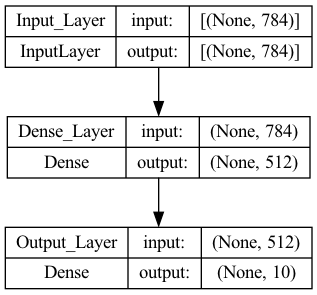

In [5]:
# Defining layers and model
input = keras.layers.Input(shape=(n_row*n_col,),name = 'Input_Layer')
dense1 = keras.layers.Dense(512, activation="relu",name = 'Dense_Layer')(input)
output = keras.layers.Dense(n_labels, activation="softmax",name = 'Output_Layer')(dense1)

model = keras.Model(inputs=input, outputs=output)

# Model compilation
opt = keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss="categorical_crossentropy",metrics=["accuracy"])
keras.utils.plot_model(model,show_shapes=True)

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 784)]             0         
                                                                 
 Dense_Layer (Dense)         (None, 512)               401920    
                                                                 
 Output_Layer (Dense)        (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


The number of parameters in the second line (401920) is the result of = (784 (input size) * 512 (neurons in the dense layer)) + 512 (number of biases, one for each neuron), that means the number of conections between layers. The third line is 512*10 + 20 for the same reason.

**Loss Function: ** Function to minimize, especifically cross-entropy means ** PENDIENTE **

**ITERATION:** Each time you modify the weigths.
**EPOCH:** Each time we use all of the training data.
**BATCH SIZE:** Amount of values to take into account in each iteration inside of an epoch.

**Questions**
¿Cuál es el significado del loss y accuracy de una época? Es el último valor o el promedio de todas??
¿Qué pasa si la división del total de los datos con batch size no es un entero? EL último set tiene una menor cantidad de valores? o se rellena con más valores???

In [6]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5,restore_best_weights=True)
model.fit(train_images, train_labels, epochs=30, batch_size=128)
score = model.evaluate(test_images,test_labels)

Epoch 1/30
469/469 [==============================] - 5s 10ms/step - loss: 0.3042 - accuracy: 0.9223
Epoch 2/30
469/469 [==============================] - 4s 9ms/step - loss: 0.1372 - accuracy: 0.9662
Epoch 3/30
469/469 [==============================] - 4s 9ms/step - loss: 0.1088 - accuracy: 0.9749
Epoch 4/30
469/469 [==============================] - 4s 9ms/step - loss: 0.1018 - accuracy: 0.9787
Epoch 5/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0831 - accuracy: 0.9829
Epoch 6/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0729 - accuracy: 0.9851
Epoch 7/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0712 - accuracy: 0.9864
Epoch 8/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0656 - accuracy: 0.9876
Epoch 9/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0633 - accuracy: 0.9891
Epoch 10/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0535 - accuracy: 0.990

In [ ]:
def buildModel(nrow,ncol,n_labels,optimizer = 'adam',learning_rate = 0.01,dense_function = 'relu',dense_units = 512):
    # Defining layers and model
    input = keras.layers.Input(shape=(n_row*n_col,),name = 'Input_Layer')
    dense1 = keras.layers.Dense(dense_units, activation=dense_function,name = 'Dense_Layer')(input)
    output = keras.layers.Dense(n_labels, activation="softmax",name = 'Output_Layer')(dense1)

    model = keras.Model(inputs=input, outputs=output)

    if(optimizer.lower() == 'adam'):
        opt = keras.optimizers.Adam(learning_rate=learning_rate)
    elif(optimizer.lower() == 'sgd'):
        opt = keras.optimizers.SGD(learning_rate=learning_rate)
    elif(optimizer.lower() == 'rmsprop'):
        opt = keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif (optimizer.lower() == 'adamw'):
        opt = keras.optimizers.AdamW(learning_rate=learning_rate)
    elif (optimizer.lower() == 'adadelta'):
        opt = keras.optimizers.Adadelta(learning_rate=learning_rate)
    elif (optimizer.lower() == 'adagrad'):
        opt = keras.optimizers.Adagrad(learning_rate=learning_rate)
    elif (optimizer.lower() == 'adamax'):
        opt = keras.optimizers.Adamax(learning_rate=learning_rate)
    elif (optimizer.lower() == 'adafactor'):
        opt = keras.optimizers.Adafactor(learning_rate=learning_rate)
    elif (optimizer.lower() == 'nadam'):
        opt = keras.optimizers.Nadam(learning_rate=learning_rate)
    elif (optimizer.lower() == 'ftrl'):
        opt = keras.optimizers.Ftrl(learning_rate=learning_rate)
    else:
        print('Optimizer not properly defined')

    # Model compilation
    opt = keras.optimizers.RMSprop(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss="categorical_crossentropy",metrics=["accuracy"])
    print(model.summary())
    keras.utils.plot_model(model,show_shapes=True)
    return model

def fitModel(train_images,train_labels,epochs=10,batch_size=128, patience = 5):
    callback = keras.callbacks.EarlyStopping(monitor='loss', patience = patience,restore_best_weights=True)
    model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size)
    score = model.evaluate(test_images,test_labels)